In [1]:
#Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
%matplotlib inline
sns.set()

# Context/Контекст

<dd>Цель: анализ синтетического набора данных, основанного на реальном наборе данных о пассажирах, которые плыли на корабле Titanic.</dd>

Источник данных: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data


<dt>Задачи:</dt>
<dd>1. Оценка качества данных.</dd>
<dd>2. Исследование данных.</dd>
<dd>3. Итоги.</dd>


In [2]:
#Загрузка данных 
train_data = pd.read_csv(r'D:\RSSchool\2_data_exploration\train.csv')
print("Количество наблюдений: " , train_data.shape[0])
train_data.head()


Количество наблюдений:  100000


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


## Описание переменных:

__PassengerId__ — уникальный ID пассажира;

__Survived__ — выжил пассажир или нет (0 - нет, 1 - да);

__Pclass__ — класс билета (1 - 1-ый класс, 2 - 2-ой класс; 3 - 3-ий класс);

__Name__ — имя пассажира;

__Sex__ — пол пассажира (male - мужской, female - женский);

__Age__ — возраст пассажира;

__SibSp__ — количество братьев и сестер / супругов на борту Титаника;

__Parch__ — количество родителей / детей на борту Титаника;

__Ticket__ — номер билета;

__Fare__ — стоимость билета;

__Cabin__ — номер каюты;

__Embarked__ — порт посадки (C - Шербур, Q = Квинстаун, S = Саутгемптон) . 

Всего 11 переменных (не считая __PassengerId__).
Из них 7 категориальных переменных. 4 числовые переменные. 
Всего наблюдений 100000.


# Data quality assessment/Оценка качества данных

In [3]:
#Общая классификация данных, информация о типах данных
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Исходя из представленных данных можем сделать вывод о том, что столбцы Age, Ticket, Fare, Cabin, Embarked заполнены неполностью, имеются потерянные данные. Больше всего данных потеряно в стобце Cabin, поэтому рационально будет удалить этот стобец. 

In [4]:
#Поиск дубликатов в данных
print ("Количество дубликатов: " , len(train_data[train_data.duplicated()]))


Количество дубликатов:  0


Дубликатов в исследуемом наборе данных не выявлено.

In [5]:
#Уникальные значения столбца
print ("Количество уникальных значений колонки Name: " , len(train_data.Name.value_counts())  )
print ("Количество уникальных значений колонки Name: " , len(train_data.Ticket.value_counts())  )
print ("Количество уникальных значений колонки Name: " , len(train_data.PassengerId.value_counts())  )

Количество уникальных значений колонки Name:  92144
Количество уникальных значений колонки Name:  75331
Количество уникальных значений колонки Name:  100000


Переменные Ticket, Name, PassengerId в большинстве своем уникальные для каждого пассажира и не несут какой-либо статистической информации. 

In [6]:
#Копирование датафрейма и удаление из него неинформативных столбцов
synthanic_data = train_data.copy()
synthanic_data.drop (['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
synthanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,male,NaN,2,0,27.14,S
1,0,3,male,NaN,0,0,13.35,S
2,0,3,male,0.33,1,2,71.29,S
3,0,3,male,19.00,0,0,13.04,S
4,1,3,male,25.00,0,0,7.76,S


In [7]:
#Описательная статистика данных
synthanic_data[['Age', 'SibSp', 'Parch', 'Fare' ]].describe()

,Age,SibSp,Parch,Fare
count,96708.000000,100000.000000,100000.000000,99866.00000
mean,38.355472,0.397690,0.454560,43.92933
std,18.313556,0.862566,0.950076,69.58882
min,0.080000,0.000000,0.000000,0.68000
25%,25.000000,0.000000,0.000000,10.04000
50%,39.000000,0.000000,0.000000,24.46000
75%,53.000000,1.000000,1.000000,33.50000
max,87.000000,8.000000,9.000000,744.66000


Исходя из описательной статистики можно сделать вывод о том, что пассажиры на борту разновозрастные от младеца до 87летнего человека.

Максимальное значение SibSp	= 8, это значит, что на борту были семьи. 

Цена билета варьируется от 0.68 до 744.66, но среднее mean=43.92933. Это значит, что большинство билетов стоило много меньше самого дорогого.  А медиана равна 24.46, что означает, что половина билетов стоила менее 24.46.

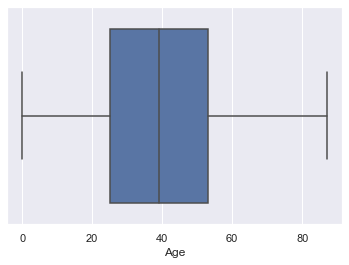

In [8]:
# Построим boxplot, чтобы оценить возраст большинства пассажиров
sns.boxplot(x= synthanic_data['Age']);

Из этого можно сделать вывод, что большинство пассажиров на корабле было средневозрастных (примерно от 20 до 55 лет).

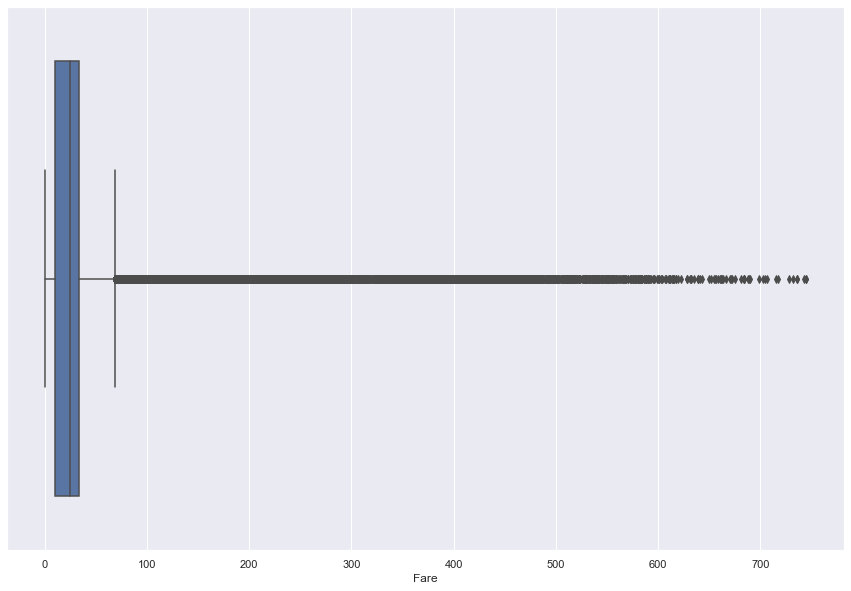

In [9]:
# Построим boxplot, чтобы оценить цену на билеты
plt.figure(figsize=(15,10))
sns.boxplot(x= synthanic_data['Fare']);

Не сложно заметить, что большиство билетов были до 50.

Посмотрим в каком порту садилось на борт больше всего пассажиров.

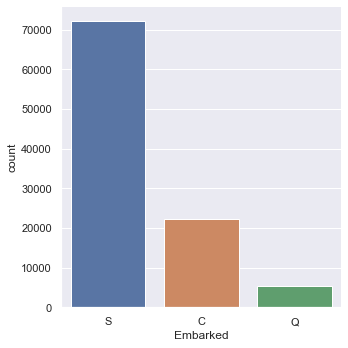

In [10]:
sns.catplot(x='Embarked', kind='count', data=synthanic_data);

Визуально видно, что больше всего пассажиров зашли на борт корабля в порту S (Саутгемптон).

Количество женщин =  42774
Количество мужчин =  57226
Процент женщин =  42.774 %
Процент мужчин =  57.226 %


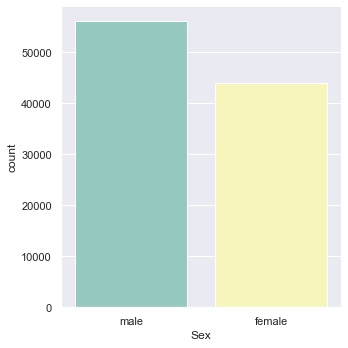

In [11]:
print('Количество женщин = ', synthanic_data.Survived.value_counts()[1])
print('Количество мужчин = ', synthanic_data.Survived.value_counts()[0])
print('Процент женщин = ', synthanic_data.Survived.value_counts()[1] * 100 /(synthanic_data.shape[0]), "%")
print('Процент мужчин = ', synthanic_data.Survived.value_counts()[0] * 100 /(synthanic_data.shape[0]), "%")
sns.catplot(x='Sex', kind='count', data=synthanic_data, palette="Set3");

Количество женщин и мужчин примерно одинаковое, не наблюдается явного перевеса пола.

# Data exploration/Исследование данных

В начале ислледования данных посмотрим какие данные коррелелируют друг с другом большего всего. На эти переменные будем общаращать больше внимания.

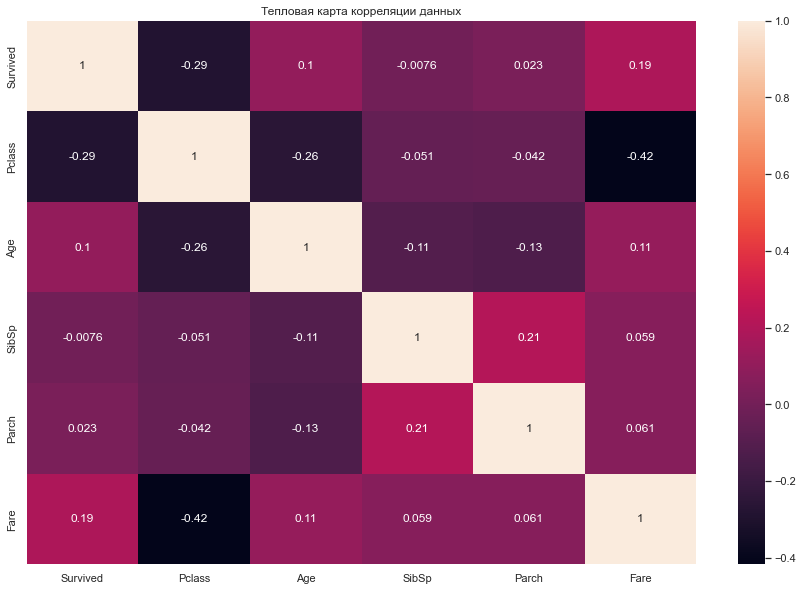

In [12]:
#Тепловая карта корреляции данных

#f, ax = plt.subplots(figsize = (9,6))
#sns.heatmap(corr, annot = True, linewidths  = 1.5, fmt = '.2f' , ax =ax)

plt.figure(figsize=(15,10))

plt.title("Тепловая карта корреляции данных")

sns.heatmap(data=synthanic_data.corr(), annot=True);



Так как коэффициенты корреляции по всей карте невысокие будем рассматривать переменные с наибольшей корреляцией. Можно сказать, что переменная Survived наиболее коррелируют с переменными Pclass,  Age и Fare. Рассмотрим их взаимосвязь подробнее. Для начала рассмотрим сколько всего пассажиров выжило на корабле. 

Количество выживших пассажиров =  42774
Количество не выживших  пассажиров =  57226
Процент выживших =  42.774 %


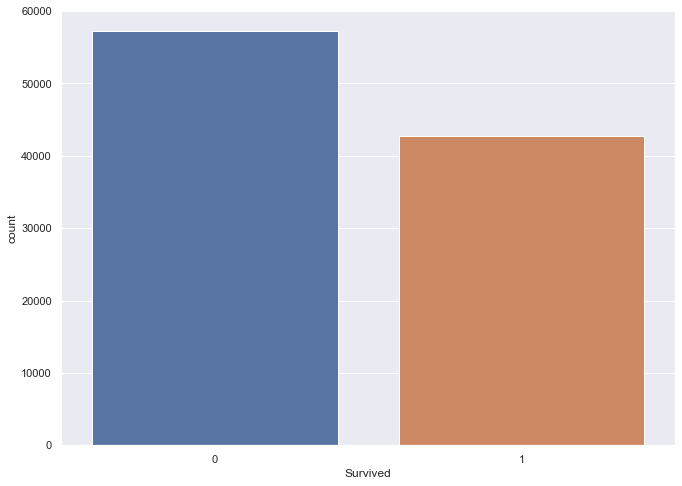

In [13]:
#Построение графика с количеством выживших (1) и количеством не выживших (0) пассажиров

plt.figure(figsize=(11,8))
print('Количество выживших пассажиров = ', synthanic_data.Survived.value_counts()[1])
print('Количество не выживших  пассажиров = ', synthanic_data.Survived.value_counts()[0])
print('Процент выживших = ', synthanic_data.Survived.value_counts()[1] * 100 /(synthanic_data.shape[0]), "%")

sns.countplot(x='Survived', data = synthanic_data );

Процент выживших после крушения корабля составил 42.774 %, это означает, что больше половины пассажиров погибло. Посмотрим какие факторы способствовали выживанию пассажиров. Проверим гипотезу о том, влиеяет ли пол пассажира на выживаемость. 

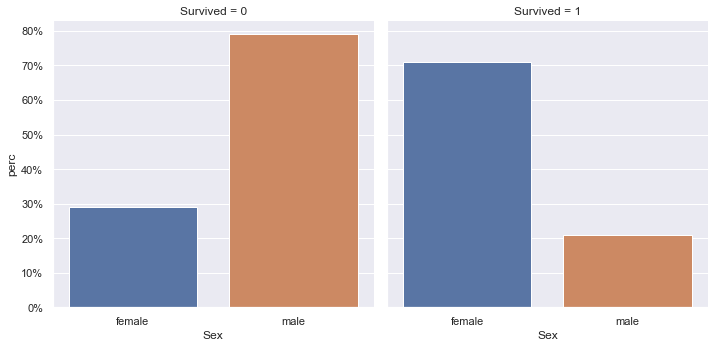

In [14]:
#Диагрраммы зависимости пола и выживания в процентах. 
synthanic_data_ss = (synthanic_data.groupby(['Sex'])['Survived']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index() )
p = sns.catplot(x = 'Sex', y='perc', col = 'Survived', kind = 'bar', data = synthanic_data_ss)
for ax in p.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

Диаграммы показывают, что процент не выживших мужчин более, чем в 2 раза выше, чем не выжившие женщины. А это значит, что пол влиял на выжимаемость. На диаграмме справа видно, что процент выживших женщин около 70%, в то время как у мужчин около 20%. Из этого можно сделать предположение о том, что спасали в основном женщин.

Посмотрим сейчас на возраст выживших.

In [15]:
#Разобьем колонку Age на возрастные группы по 10 лет

synthanic_data['Age_ten'] = np.nan
for i in range(10,0,-1):
    synthanic_data.loc[synthanic_data['Age'] <= i*10, 'Age_ten'] = i

print(synthanic_data[['Age' , 'Age_ten']].head(10))


     Age  Age_ten
0    NaN      NaN
1    NaN      NaN
2   0.33      1.0
3  19.00      2.0
4  25.00      3.0
5  35.00      4.0
6   7.00      1.0
7   6.00      1.0
8  27.00      3.0
9  66.00      7.0


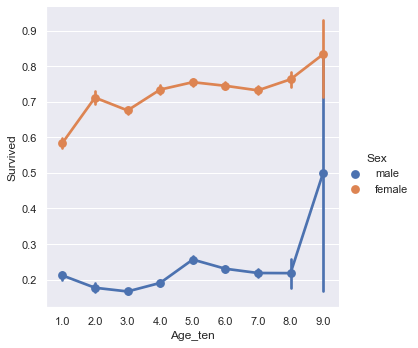

In [16]:
#Построим график, показывающий вероятность выжить в определенном возрастном диапозоне в зависимости от пола
sns.catplot(x= 'Age_ten',y = 'Survived',hue='Sex',kind='point',data = synthanic_data);

Данный график еще раз подчеркивает, что у женщин была большая вероятностьь выжить, чем у мужчин. Причем исходя из графика можно заметить, что спаасали в основном пожилых людей и женщин.У мужчин спасались более возрастные и совсем маленькие пассажиры.

Рассмотрим следующую зависимость выживаемости и класса каюты.


In [17]:
#Построение свобной таблицы Класс, Выживаемость

pd.crosstab(synthanic_data.Pclass, synthanic_data.Survived, margins = True).style.background_gradient(cmap = 'YlGnBu')

Survived,0,1,All
Pclass,,,
1,12739,17576,30315
2,13622,15057,28679
3,30865,10141,41006
All,57226,42774,100000


Из этой сводной таблицы видно, что пассажиры с Pclass=1 и Pclass=2, выживали больше, чем пассажиры с Pclass=3. Причем пассажиров с Pclass=3 не спаслось в 3 раза больше, чем выжило. Это могло быть связано с расположением кают. Из кают с Pclass=3 было возможно сложнее выбраться. Посмотрим на графическое отображение данной таблицы.

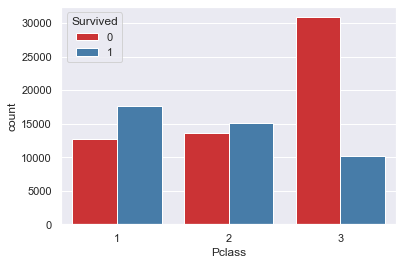

In [18]:
#Построение гистрограммы выживших/не выживших в 3 разных классах
sns.countplot(x='Pclass',hue='Survived',data=synthanic_data, palette="Set1");

Больше всего не выживших было именно с кают Pclass=3.

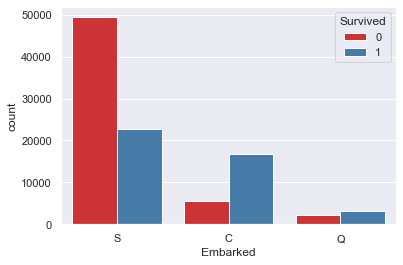

In [19]:
#Построение гистрограммы выживших/не выживших в 3 разных портах
sns.countplot(x='Embarked',hue='Survived',data=synthanic_data, palette="Set1" );

Большое количество пассажиров, которые взошли на корабль в порту S, не спаслись. Вероятно, это не говорит о прямой связи выживания и порта, а скорее говорит о том, что в порту S садилось большинство пассажиров 3 класса. Проверим эту гипотезу.

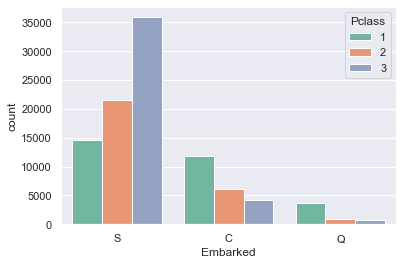

In [20]:
#Построение гистрограммы порт - класс, отражающей, количество пассажиров в каждом из портов с определенным классом
sns.countplot(x='Embarked',hue='Pclass',data=synthanic_data, palette="Set2" );

Предположение выше верное, в порту S садилось на корабль большинство пассажиров клаасса 3, а они как видно было ранее в большинстве своем не спасались из-за неудобного расположения кают.

Посмотрим на зависимость выживания от стоимости билета. Предположительно , чем выше стоимость билета, тем больше вероятность выживания. Проверим эту гипотезу.


In [21]:
#Разобьем колонку Fare на группы по 20 условных единиц
synthanic_data['Fare_20'] = np.nan
for i in range(36,0,-1):
        synthanic_data.loc[synthanic_data['Fare'] <= i*20, 'Fare_20'] = i
print(synthanic_data[['Fare' , 'Fare_20']].head(10))


    Fare  Fare_20
0  27.14      2.0
1  13.35      1.0
2  71.29      4.0
3  13.04      1.0
4   7.76      1.0
5   6.71      1.0
6   9.77      1.0
7  31.50      2.0
8  73.02      4.0
9   9.14      1.0


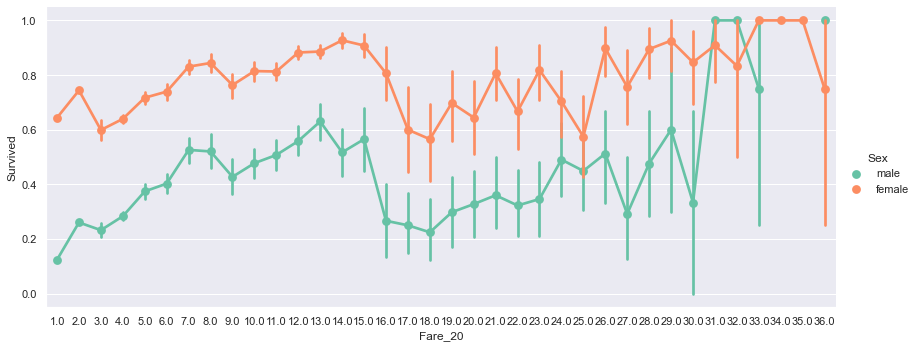

In [22]:
#Построим график, показывающий вероятность выжить в определенном финансовом диапозоне в зависимости от пола
sns.catplot(x= 'Fare_20',y = 'Survived',hue='Sex',kind='point',data = synthanic_data,  aspect=19/8, palette="Set2");

Исходя из данного отображения невозможно уверенно сказать о том, что пассажиры с более дорогими билетами спасались с большей вероятностью. В ценовом диапозоне прослеживается все та же зависимость выживания от класса каюты. 

Процент выживших SibSp=0 (без братьев/сестер/супругов на борту)  =  42.6842909368691 %
Процент выживших c SibSp=1 (1 брат/сестра/супруг на борту)  =  43.37483550966697 %


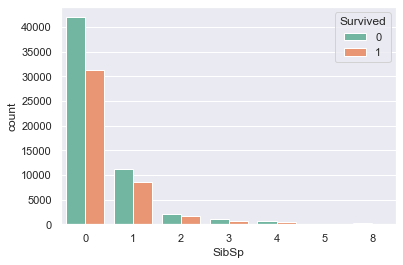

In [23]:
#Построение гистрограммы зависимости переменных SibSp и Survived

print('Процент выживших SibSp=0 (без братьев/сестер/супругов на борту)  = ', synthanic_data[synthanic_data.Survived==1]
      .SibSp.value_counts()[0] * 100 /(synthanic_data.SibSp.value_counts()[0]), "%")
print('Процент выживших c SibSp=1 (1 брат/сестра/супруг на борту)  = ', synthanic_data[synthanic_data.Survived==1]
      .SibSp.value_counts()[1] * 100 /(synthanic_data.SibSp.value_counts()[1]), "%")

sns.countplot(x='SibSp',hue='Survived',data=synthanic_data, palette="Set2" );

Количество братьев, сестер и супругов на борту корабля никак не влияло на выживаемость. Это видно из процентного соотношения выживших в каждой категории переменной SibSp.

Процент выживших Parch=0 (без родителей/детей на борту)  =  40.52080500407941 %
Процент выживших c Parch=1 (1 родитель/ребенок на борту)  =  59.20283164050477 %
Процент выживших c Parch=1 (2 родителя/ребенка на борту)  =  38.47454610181559 %
Процент выживших c Parch=1 (3 родителя/ребенка на борту)  =  49.23702950152594 %


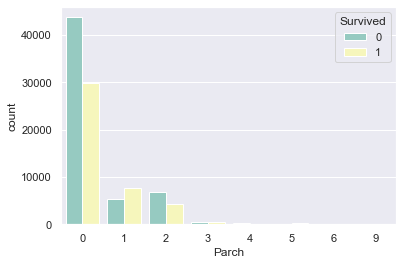

In [24]:
#Построение гистрограммы зависимости переменных Parch и Survived

print('Процент выживших Parch=0 (без родителей/детей на борту)  = ', synthanic_data[synthanic_data.Survived==1]
      .Parch.value_counts()[0] * 100 /(synthanic_data.Parch.value_counts()[0]), "%")
print('Процент выживших c Parch=1 (1 родитель/ребенок на борту)  = ', synthanic_data[synthanic_data.Survived==1]
      .Parch.value_counts()[1] * 100 /(synthanic_data.Parch.value_counts()[1]), "%")
print('Процент выживших c Parch=1 (2 родителя/ребенка на борту)  = ', synthanic_data[synthanic_data.Survived==1]
      .Parch.value_counts()[2] * 100 /(synthanic_data.Parch.value_counts()[2]), "%")
print('Процент выживших c Parch=1 (3 родителя/ребенка на борту)  = ', synthanic_data[synthanic_data.Survived==1]
      .Parch.value_counts()[3] * 100 /(synthanic_data.Parch.value_counts()[3]), "%")

sns.countplot(x='Parch',hue='Survived',data=synthanic_data, palette="Set3" );

Закономерной связи переменных Parch и Survived не наблюдается. Можно отметить, что количество выживших с 1 родителем/ребенком выше, но вероятно это не закономерность.

# Summary/Итоги

Исходя из анализа синтетических данных, основанных на реальных данных о пассажирах коорабля Титаник, можно сделать следующие выводы:
<dd>1. Вероятность выжить при крушении корабля была выше у женщин, нежели у мужчин. Но это не значит, что при явном перевесе на борту женщин, их выживаемость была бы такой высокой. Вероятно мужчины спасали женщин и пожилых людей, при этом самим выжить не удавалось.</dd>


<dd>2. Вероятность выжить была выше у пассажиров, располагавшихся в классах 1 и 2. Среди пассажиров класса 3 выжило около трети. Можно предположить, что это связано с неудобным расположением кают 3 класса. </dd>


<dd>3. Конкретной связи стоимости билета и процента выживаемости нет.</dd>
<dd>4. Из-за связи между переменными Embarked, Pclass и Fare и прямой связи переменных Pclass и Survived, прослеживается связь между переменными Embarked, Fare и Survived. Но на мой вгляд эта связь косвенная.</dd>
<dd>5. Закономерной связи переменной Survived с переменными Parch и SibSp не наблюдается. Это говорит о том, что на процент выживаемости не влияет путешествовали семьей пассажиры или по одиночке.</dd>
